# Importing the libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statistics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsRegressor


# Importing The dataset

In [54]:
sale_data = pd.read_csv('Salary_Data.csv')

# Dealing with Missing values

In [55]:
print(sale_data.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [56]:
# Handle missing values (replace with mean, median, or other strategies)
sale_data[['Age','Salary','Years of Experience']]=sale_data[['Age','Salary','Years of Experience']].apply(lambda x:x.fillna(x.mean()))

In [57]:

sale_data[['Gender','Education Level','Job Title']]=sale_data[['Gender','Education Level','Job Title']].replace(np.NaN, statistics.mode(sale_data[['Gender','Education Level','Job Title']]))

In [58]:
print(sale_data.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [59]:
# find outliers
z_scores = zscore(sale_data[['Age','Salary','Years of Experience']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
sale_data_outliers = sale_data[~outliers]

# Remove duplicates

In [60]:
# Drop duplicated data
sale_data = sale_data.drop_duplicates()

# Print the shape of the original and deduplicated dataframes
# print("Original Shape:", sale_data.shape)
#  print("Deduplicated Shape:", df_no_duplicates.shape)


# Encoding for columns

In [61]:
categorical_cols = ['Gender', 'Education Level', 'Job Title'] 

# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
sale_data[categorical_cols] = sale_data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [62]:
print(sale_data.head)

<bound method NDFrame.head of        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0     32.0       2                0        178                  5.0   90000.0
1     28.0       0                4         18                  3.0   65000.0
2     45.0       2                6        146                 15.0  150000.0
3     36.0       0                0        117                  7.0   60000.0
4     52.0       2                4         26                 20.0  200000.0
...    ...     ...              ...        ...                  ...       ...
6623  43.0       0                5         24                 15.0  150000.0
6624  27.0       2                3        120                  2.0   40000.0
6625  33.0       0                1         34                  8.0   80000.0
6628  37.0       2                1        118                  7.0   90000.0
6631  30.0       0                1        120                  5.0   70000.0

[1792 rows x 6 columns]>


# Drop specified columns

In [63]:
columns_to_drop = ['Gender']

# Drop specified columns
sale_data = sale_data.drop(columns=columns_to_drop)

# Print the shape of the original and modified dataframes
print("Original Shape:", sale_data.shape)
# print("Modified Shape:", df_dropped.shape)

Original Shape: (1792, 5)


## Splitting the dataset into the Training set and Test set

In [64]:
X = sale_data.iloc[:, :-1].values
y = sale_data.iloc[:, -1].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Multiple Linear Regression model on the Training set

In [88]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [111]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[100270.55 100000.  ]
 [ 62038.52  40000.  ]
 [ 66157.25  30000.  ]
 [ 68847.98  70000.  ]
 [117702.97 190000.  ]
 [102630.2   95000.  ]
 [143482.12 140000.  ]
 [ 73113.09  40000.  ]
 [ 74590.37  70000.  ]
 [ 61213.33  55000.  ]
 [104660.41 140000.  ]
 [139964.43 120000.  ]
 [117589.69 110000.  ]
 [131921.74 120000.  ]
 [177562.88 190000.  ]
 [142961.95 185000.  ]
 [154446.74 180000.  ]
 [160521.53 190000.  ]
 [ 80508.25 125000.  ]
 [185250.33 175000.  ]
 [100475.78 180000.  ]
 [ 66381.12  32000.  ]
 [ 61944.59  40000.  ]
 [110183.52  90000.  ]
 [ 90842.02 104702.  ]
 [ 88915.69  85000.  ]
 [ 99090.69  80000.  ]
 [ 90950.46  76898.  ]
 [ 94576.77 120000.  ]
 [100680.47  80000.  ]
 [ 58627.23  35000.  ]
 [124025.53 120000.  ]
 [ 74561.45  71000.  ]
 [ 51687.83  35000.  ]
 [ 73357.12  60000.  ]
 [ 60324.85  55000.  ]
 [117727.05 150000.  ]
 [220034.81 190004.  ]
 [172201.44 140000.  ]
 [128546.71 134482.  ]
 [154477.61 150000.  ]
 [137544.78 140000.  ]
 [133956.71 160000.  ]
 [252161.66

# Loss Curve

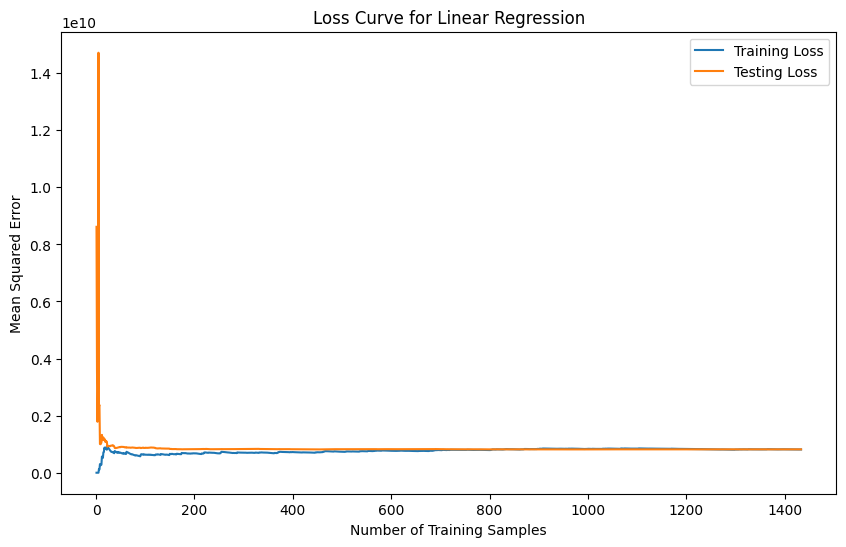

In [70]:
#لو غلط امسحها
train_loss = []
test_loss = []

# Training the model and collecting loss values
for i in range(1, len(X_train) + 1):
    regressor.fit(X_train[:i], y_train[:i])

    # Calculate training loss
    y_train_pred = regressor.predict(X_train[:i])
    train_loss.append(mean_squared_error(y_train[:i], y_train_pred))

    # Calculate testing loss
    y_test_pred = regressor.predict(X_test)
    test_loss.append(mean_squared_error(y_test, y_test_pred))

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(X_train) + 1), test_loss, label='Testing Loss')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression')
plt.legend()
plt.show()

## Training the K-NN model on the Training set

In [91]:
knn_reg = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors

# Train the model
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model

In [103]:
#لو غلط امسحها
threshold = 4 # Choose an appropriate threshold
# Convert regression predictions into binary predictions based on the threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)


# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
print(conf_mat)


[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [146]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mpae = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Percentage Absolute Error (MPAE): {mpae}%')
print(f'Score: {r2}')



Mean Squared Error (MSE): 818602419.8897661
Root Mean Squared Error (RMSE): 28611.228912609924
Mean Percentage Absolute Error (MPAE): 72.58618557672267%
Score: 0.6961752427106402


## Predicting the Test set results

In [73]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 93333.33 100000.  ]
 [ 38333.33  40000.  ]
 [ 25666.67  30000.  ]
 [ 76666.67  70000.  ]
 [126666.67 190000.  ]
 [ 95000.    95000.  ]
 [165000.   140000.  ]
 [ 35000.    40000.  ]
 [ 98333.33  70000.  ]
 [ 57031.67  55000.  ]
 [ 96666.67 140000.  ]
 [150000.   120000.  ]
 [124315.67 110000.  ]
 [147000.   120000.  ]
 [183333.33 190000.  ]
 [181666.67 185000.  ]
 [178333.33 180000.  ]
 [160000.   190000.  ]
 [123333.33 125000.  ]
 [180000.   175000.  ]
 [126666.67 180000.  ]
 [ 33666.67  32000.  ]
 [ 40000.    40000.  ]
 [ 88333.33  90000.  ]
 [ 94383.   104702.  ]
 [ 85000.    85000.  ]
 [ 80000.    80000.  ]
 [ 85520.33  76898.  ]
 [ 99000.   120000.  ]
 [100395.33  80000.  ]
 [ 45000.    35000.  ]
 [126666.67 120000.  ]
 [ 98333.33  71000.  ]
 [ 92333.33  35000.  ]
 [ 60000.    60000.  ]
 [ 55000.    55000.  ]
 [142196.67 150000.  ]
 [187013.33 190004.  ]
 [150000.   140000.  ]
 [131896.67 134482.  ]
 [176666.67 150000.  ]
 [135578.33 140000.  ]
 [165000.   160000.  ]
 [186538.67

## Visualising the Training set results

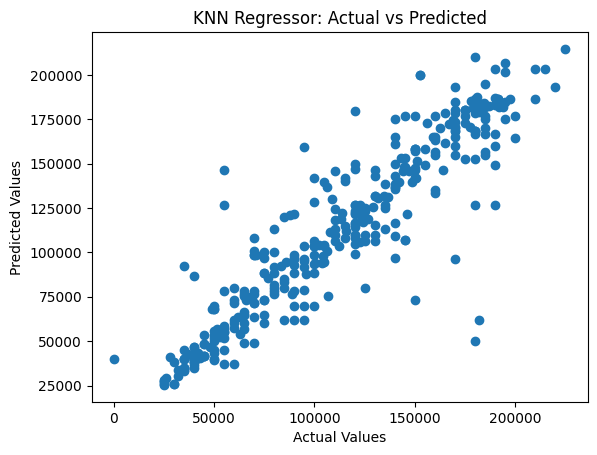

In [74]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor: Actual vs Predicted')
plt.show()
